# Lab 2 - Regression - Predicting Software Reselling Profits

Tayko Software is a software catalog firm that sells games and educational software. It started out as a software manufacturer and then added third-party titles to its oﬀerings. It recently revised its collection of items in a new catalog, which it mailed out to its customers. This mailing yielded 2000 purchases. Based on these data, Tayko wants to devise a model for predicting the spending amount that a purchasing customer will yield. The file _Tayko.csv_ contains information on 2000 purchases. Table 6.12 describes the variables to be used **(FREQ, LAST_UPDATE, WEB, GENDER, ADDRESS_RES, ADDRESS_US, SPENDING (outcome)** in the problem (the Excel file contains additional variables).

In [1]:
import pandas as pd
# load the data
tayko_df = pd.read_csv('../dmba/Tayko.csv')

In [2]:
tayko_df.rename(columns = {'Web order':'Web_order'}, inplace = True)
tayko_df.columns

Index(['sequence_number', 'US', 'source_a', 'source_c', 'source_b', 'source_d',
       'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s',
       'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web_order',
       'Gender=male', 'Address_is_res', 'Purchase', 'Spending'],
      dtype='object')

In [3]:
tayko_df

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web_order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,0,0,0,0,0,0,0,0,...,0,0,1,1701,1701,1,0,0,1,30
1996,1997,1,0,0,0,0,0,0,0,0,...,0,0,1,2633,2633,1,1,0,1,10
1997,1998,1,0,0,0,0,0,0,0,0,...,0,0,0,3394,3394,0,0,0,0,0
1998,1999,1,0,0,0,0,0,0,0,0,...,0,1,1,253,253,0,1,1,0,0


## Selecting only important variables/columns

In [4]:
tayko_df = tayko_df.loc[:,['Freq','last_update_days_ago', 'Web_order','Gender=male','Address_is_res','US','Spending']]

In [5]:
tayko_df.head(100)

,Freq,last_update_days_ago,Web_order,Gender=male,Address_is_res,US,Spending
0,2,3662,1,0,1,1,128
1,0,2900,1,1,0,1,0
2,2,3883,0,0,0,1,127
3,1,829,0,1,0,1,0
4,1,869,0,0,0,1,0
...,...,...,...,...,...,...,...
95,1,2548,1,0,0,1,230
96,0,2740,0,0,0,1,0
97,0,217,0,0,0,1,0
98,1,366,0,1,0,0,0


In [6]:
tayko_df.shape

(2000, 7)

## Checking data types of the variables within our dataset.

In [7]:
tayko_df.dtypes

Freq                    int64
last_update_days_ago    int64
Web_order               int64
Gender=male             int64
Address_is_res          int64
US                      int64
Spending                int64
dtype: object

__6.2.a__ Explore the spending amount by creating a pivot table for the categorical variables (by Gender, web order) and computing the average and standard deviation of spending in each category. 

__Answer:__ 

In [8]:
tayko_df.pivot_table(values = 'Spending', index = 'Gender=male', aggfunc = ['mean', 'std'])

,mean,std
,Spending,Spending
Gender=male,,
0,107.339642,190.83233
1,98.350810,183.02006


In [9]:
tayko_df.pivot_table(values = 'Spending', index = 'Web_order', aggfunc = ['mean', 'std'])

,mean,std
,Spending,Spending
Web_order,,
0,82.902439,173.417088
1,129.199531,200.463840


In [10]:
import numpy as np

print(tayko_df.pivot_table(values = 'Spending', index = 'Gender=male', aggfunc = [np.mean, np.std]))
print('\n')
print(tayko_df.pivot_table(values = 'Spending', index = 'Web_order', aggfunc = [np.mean, np.std]))

                   mean        std
               Spending   Spending
Gender=male                       
0            107.339642  190.83233
1             98.350810  183.02006


                 mean         std
             Spending    Spending
Web_order                        
0           82.902439  173.417088
1          129.199531  200.463840


__6.2.b.__ Explore the relationship between spending and each of the two continuous predictors by creating two scatterplots (Spending vs. Freq, and Spending vs. last_update_days_ago. Does there seem to be a linear relationship? 

__Answer:__ 

## Spending vs Frequency Plot

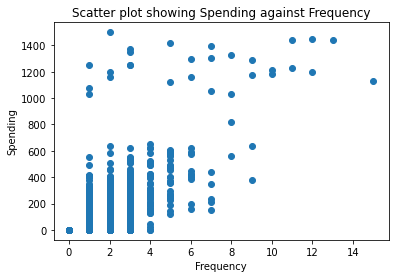

In [11]:
import matplotlib.pyplot as plt

plt.scatter('Freq', 'Spending', data = tayko_df)
plt.title('Scatter plot showing Spending against Frequency')
plt.ylabel('Spending')
plt.xlabel('Frequency')
plt.show()

__The overall relationship between Spending and Frequency is unclear. We can't tell if Spending increases or decreases as Frequency increases.__

## Spending vs last_update_days_ago Plot

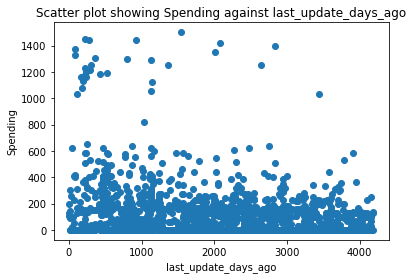

In [12]:
plt.scatter('last_update_days_ago', 'Spending', data = tayko_df)
plt.title('Scatter plot showing Spending against last_update_days_ago')
plt.ylabel('Spending')
plt.xlabel('last_update_days_ago')
plt.show()

__There appears to be no relationship between Spending and last_update but two grous of points similar to what we seen in case of Spending and Frequency above.__

__6.2.c.__ To fit a predictive model for spending:

__6.2.c.i.__ Partition the 2000 records into training and validation sets.

__Answer:__ 

In [13]:
tayko_df.iloc[0:2000]

,Freq,last_update_days_ago,Web_order,Gender=male,Address_is_res,US,Spending
0,2,3662,1,0,1,1,128
1,0,2900,1,1,0,1,0
2,2,3883,0,0,0,1,127
3,1,829,0,1,0,1,0
4,1,869,0,0,0,1,0
...,...,...,...,...,...,...,...
1995,1,1701,1,0,0,1,30
1996,1,2633,1,1,0,1,10
1997,0,3394,0,0,0,1,0
1998,1,253,0,1,1,1,0


In [14]:
# predictors and outcome
from sklearn.model_selection import train_test_split

predictors = ['US', 'Freq', 'last_update_days_ago', 'Web_order', 'Gender=male', 'Address_is_res']
outcome = 'Spending'
X = pd.get_dummies(tayko_df[predictors], drop_first = True)
y = tayko_df[outcome]

# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state = 1)
print('Training set:', train_X.shape, 'Validation set:', valid_X.shape)

Training set: (1200, 6) Validation set: (800, 6)


__6.2.c.ii.__ Run a multiple linear regression model for Spending vs. all six predictors. Give the estimated predictive equation.

__Answer:__ 

In [15]:
# fit the regression model
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge

tayko_lm = LinearRegression()
tayko_lm.fit(train_X, train_y)

# print coefficients
print('Intercept', tayko_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': tayko_lm.coef_}))

Intercept 10.176297414620365
              Predictor  coefficient
0                    US    -4.620293
1                  Freq    91.274450
2  last_update_days_ago    -0.010374
3             Web_order    18.628731
4           Gender=male    -9.111366
5        Address_is_res   -75.815354


The Regression equation is:

Spending = Intercept + (coeff1 * US) + ... + (coeffn * Address_is_res)

__6.2.c.iii.__ Based on this model, what type of purchaser is most likely to spend a large amount of money?

 __Answer:__
Anyone who is a frequent shopper.

__6.2.c.vi.__ Evaluate the predictive accuracy of the model by examining its performance on the validation set.

__Answer:__

In [16]:
predictions = tayko_lm.predict(valid_X)
result = pd.DataFrame({'Predicted': predictions, 'Actual': valid_y,
                      'Residuals': valid_y - predictions })
print(result.head(10))
print("")

from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(valid_y, predictions))
print('MSE:', metrics.mean_squared_error(valid_y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(valid_y, predictions)))

       Predicted  Actual    Residuals
674    89.214915       0   -89.214915
1699  202.231362     184   -18.231362
1282   49.159303       0   -49.159303
1315  824.841659    1289   464.158341
1210    0.121196       0    -0.121196
1636   86.766675       0   -86.766675
613    58.018614       0   -58.018614
447   247.428569    1255  1007.571431
1131   67.036615       0   -67.036615
808    67.825031       0   -67.825031

MAE: 83.60097261986078
MSE: 18697.735690891266
RMSE: 136.73966392708178


In [17]:
from dmba import regressionSummary
regressionSummary(valid_y, predictions)


Regression statistics

               Mean Error (ME) : 7.1933
Root Mean Squared Error (RMSE) : 136.7397
     Mean Absolute Error (MAE) : 83.6010


__6.2.c.vii.__ Create a histogram of the model residuals. Do they appear to follow a normal distribution? How does this aﬀect the predictive performance of the model?

__Answer:__ 


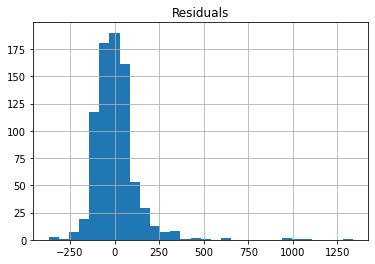

In [18]:
# compute and plot the residuals for validation data
result.Residuals.hist(bins = 30)
plt.title("Residuals")
plt.show()

__Our residuals follow a positively skewed distribution. Things we need to consider are: removing the outliers or transforming dependent variables (e.g., log transformation).__